In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
base_path = Path("A:\Downloads\Sandia\SandiaDataChallenge")

# Load
all_data_recycled = pd.read_csv(base_path / 'AllData_PreEDM_Recycled_RowColIDs.csv')
all_data_virgin = pd.read_csv(base_path / 'AllData_PreEDM_Virgin_RowColIDs.csv')
recycled_vol = pd.read_csv(base_path / 'recycled_volume.csv')
virgin_vol_1 = pd.read_csv(base_path / 'virgin_volume_pt1.csv')
virgin_vol_2 = pd.read_csv(base_path / 'virgin_volume_pt2.csv')

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Mac Prom\AppData\Local\Temp\ipykernel_15316\2802322513.py:8: SyntaxWarning: invalid escape sequence '\D'
  base_path = Path("A:\Downloads\Sandia\SandiaDataChallenge")


In [8]:
all_data = pd.concat([all_data_recycled, all_data_virgin], ignore_index=True)
all_data

,Row,B3_DATUM_B_LOC,B3_REF_OD,C1_LOC_INSIDE_PLN,C4_LOC_TOP_PLN,B3_THICK1_WALL,B3_THICK2_WALL,B3_THICK3_WALL,B3_THICK4_WALL,Layout,BuildDate,Powder,MeasureSeq,Nonconformity,RowID,ColID,PlateID
0,La1,0.4171,0.4476,0.0539,0.2659,0.0158,0.0160,0.0149,0.0164,11X11TA,8/22/2019,Recycled,PreEDM,False,1,1,L
1,La2,0.4164,0.4478,0.0534,0.2662,0.0168,0.0167,0.0152,0.0141,11X11TA,8/22/2019,Recycled,PreEDM,False,1,2,L
2,La3,0.4173,0.4479,0.0541,0.2668,0.0151,0.0163,0.0155,0.0151,11X11TA,8/22/2019,Recycled,PreEDM,False,1,3,L
3,La4,0.4172,0.4485,0.0531,0.2663,0.0155,0.0157,0.0183,0.0147,11X11TA,8/22/2019,Recycled,PreEDM,False,1,4,L
4,La5,0.4175,0.4487,0.0541,0.2663,0.0153,0.0153,0.0156,0.0153,11X11TA,8/22/2019,Recycled,PreEDM,False,1,5,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Kk7,0.4173,0.4477,0.0535,0.2657,0.0158,0.0156,0.0165,0.0169,11X11TA,8/21/2019,Virgin,PreEDM,False,11,7,K
1556,Kk8,0.4169,0.4483,0.0533,0.2655,0.0164,0.0157,0.0154,0.0156,11X11TA,8/21/2019,Virgin,PreEDM,False,11,8,K
1557,Kk9,0.4168,0.4494,0.0520,0.2649,0.0175,0.0165,0.0160,0.0158,11X11TA,8/21/2019,Virgin,PreEDM,False,11,9,K
1558,Kk10,0.4166,0.4487,0.0514,0.2649,0.0168,0.0161,0.0165,0.0170,11X11TA,8/21/2019,Virgin,PreEDM,False,11,10,K


In [12]:
renamed = ['LID', 'LED', 'FH', 'LH', 'LT1', 'LT2', 'LT3', 'LT4']
old_cols = all_data.columns.tolist()
new_cols = old_cols[:1] + renamed + old_cols[9:]  # Keep first col, replace 1-8
all_data.columns = new_cols
specs = {
    'LID': (0.415, 0.435),
    'LED': (0.445, 0.469),
    'FH': (0.049, 0.069),
    'LH': (0.261, 0.281),
    'LT1': (0.010, 0.017),
    'LT2': (0.010, 0.017),
    'LT3': (0.010, 0.017),
    'LT4': (0.010, 0.017)
}

In [13]:
def check_in_spec(value, lower, upper):
    return (value >= lower) & (value <= upper)
for param, (lower, upper) in specs.items():
    col_name = f"{param}_in_spec"
    all_data[col_name] = check_in_spec(all_data[param], lower, upper)

spec_columns = [f"{param}_in_spec" for param in specs.keys()]
all_data['overall_in_spec'] = all_data[spec_columns].all(axis=1)
all_data['is_scrap'] = ~all_data['overall_in_spec']

total_6x6 = (all_data['Layout'] == '6X6').sum()
total_6x6_scrap = ((all_data['Layout'] == '6X6') & (all_data['is_scrap'])).sum()
ratio6x6 = total_6x6_scrap / total_6x6

total_6x6TA = (all_data['Layout'] == '6X6TA').sum()
total_6x6TA_scrap = ((all_data['Layout'] == '6X6TA') & (all_data['is_scrap'])).sum()
ratio6x6TA = total_6x6TA_scrap / total_6x6TA

total_11x11TA = (all_data['Layout'] == '11X11TA').sum()
total_11x11TA_scrap = ((all_data['Layout'] == '11X11TA') & (all_data['is_scrap'])).sum()
ratio11x11TA = total_11x11TA_scrap / total_11x11TA

layout_scrap_ratios = {
    '6X6': ratio6x6,
    '6X6TA': ratio6x6TA,
    '11X11TA': ratio11x11TA
}
print(layout_scrap_ratios)

{'6X6': np.float64(0.06481481481481481), '6X6TA': np.float64(0.09259259259259259), '11X11TA': np.float64(0.19345238095238096)}


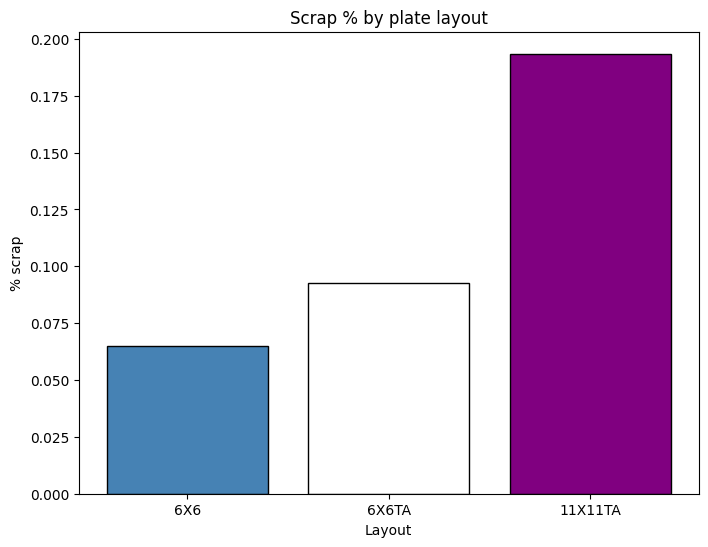

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(layout_scrap_ratios.keys(), layout_scrap_ratios.values(), 
        color=['steelblue', 'white', 'purple'], edgecolor='black')
plt.title('Scrap % by plate layout')
plt.xlabel('Layout')
plt.ylabel('% scrap')
plt.show()

In [16]:
total_layout_count = {
    '6X6TA': total_6x6TA,
    '11X11TA': total_11x11TA,
    '6X6': total_6x6
}
print(total_layout_count)

{'6X6TA': np.int64(108), '11X11TA': np.int64(1344), '6X6': np.int64(108)}


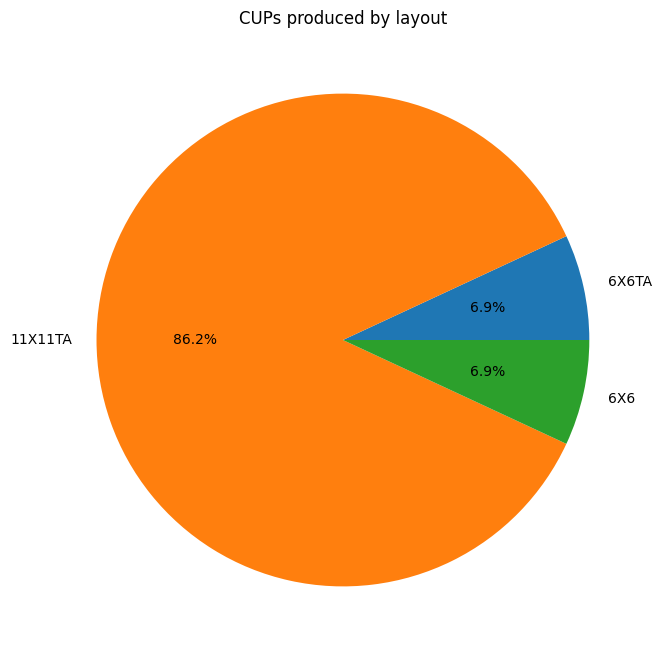

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(total_layout_count.values(), labels=total_layout_count.keys(), autopct='%1.1f%%')
plt.title('CUPs produced by layout')
plt.show()

In [20]:
# Weeks - FIXED
def assign_week(dat):
    week1 = ['A', 'B', 'C', 'D', 'E']
    week2 = ['F', 'G', 'H', 'I', 'J']
    week4v = ['K']
    week4r = ['L', 'M']
    week5r = ['N', 'O', 'P', 'Q', 'R']
    
    dat['week'] = np.nan
    
    if 'PlateID' not in dat.columns:
        print("Available columns:", dat.columns.tolist())
        return dat
    
    dat.loc[dat['PlateID'].isin(week1), 'week'] = 1
    dat.loc[dat['PlateID'].isin(week2), 'week'] = 2
    dat.loc[dat['PlateID'].isin(week4v), 'week'] = 4
    dat.loc[dat['PlateID'].isin(week4r), 'week'] = 4
    dat.loc[dat['PlateID'].isin(week5r), 'week'] = 5
    
    return dat

all_data = assign_week(all_data)

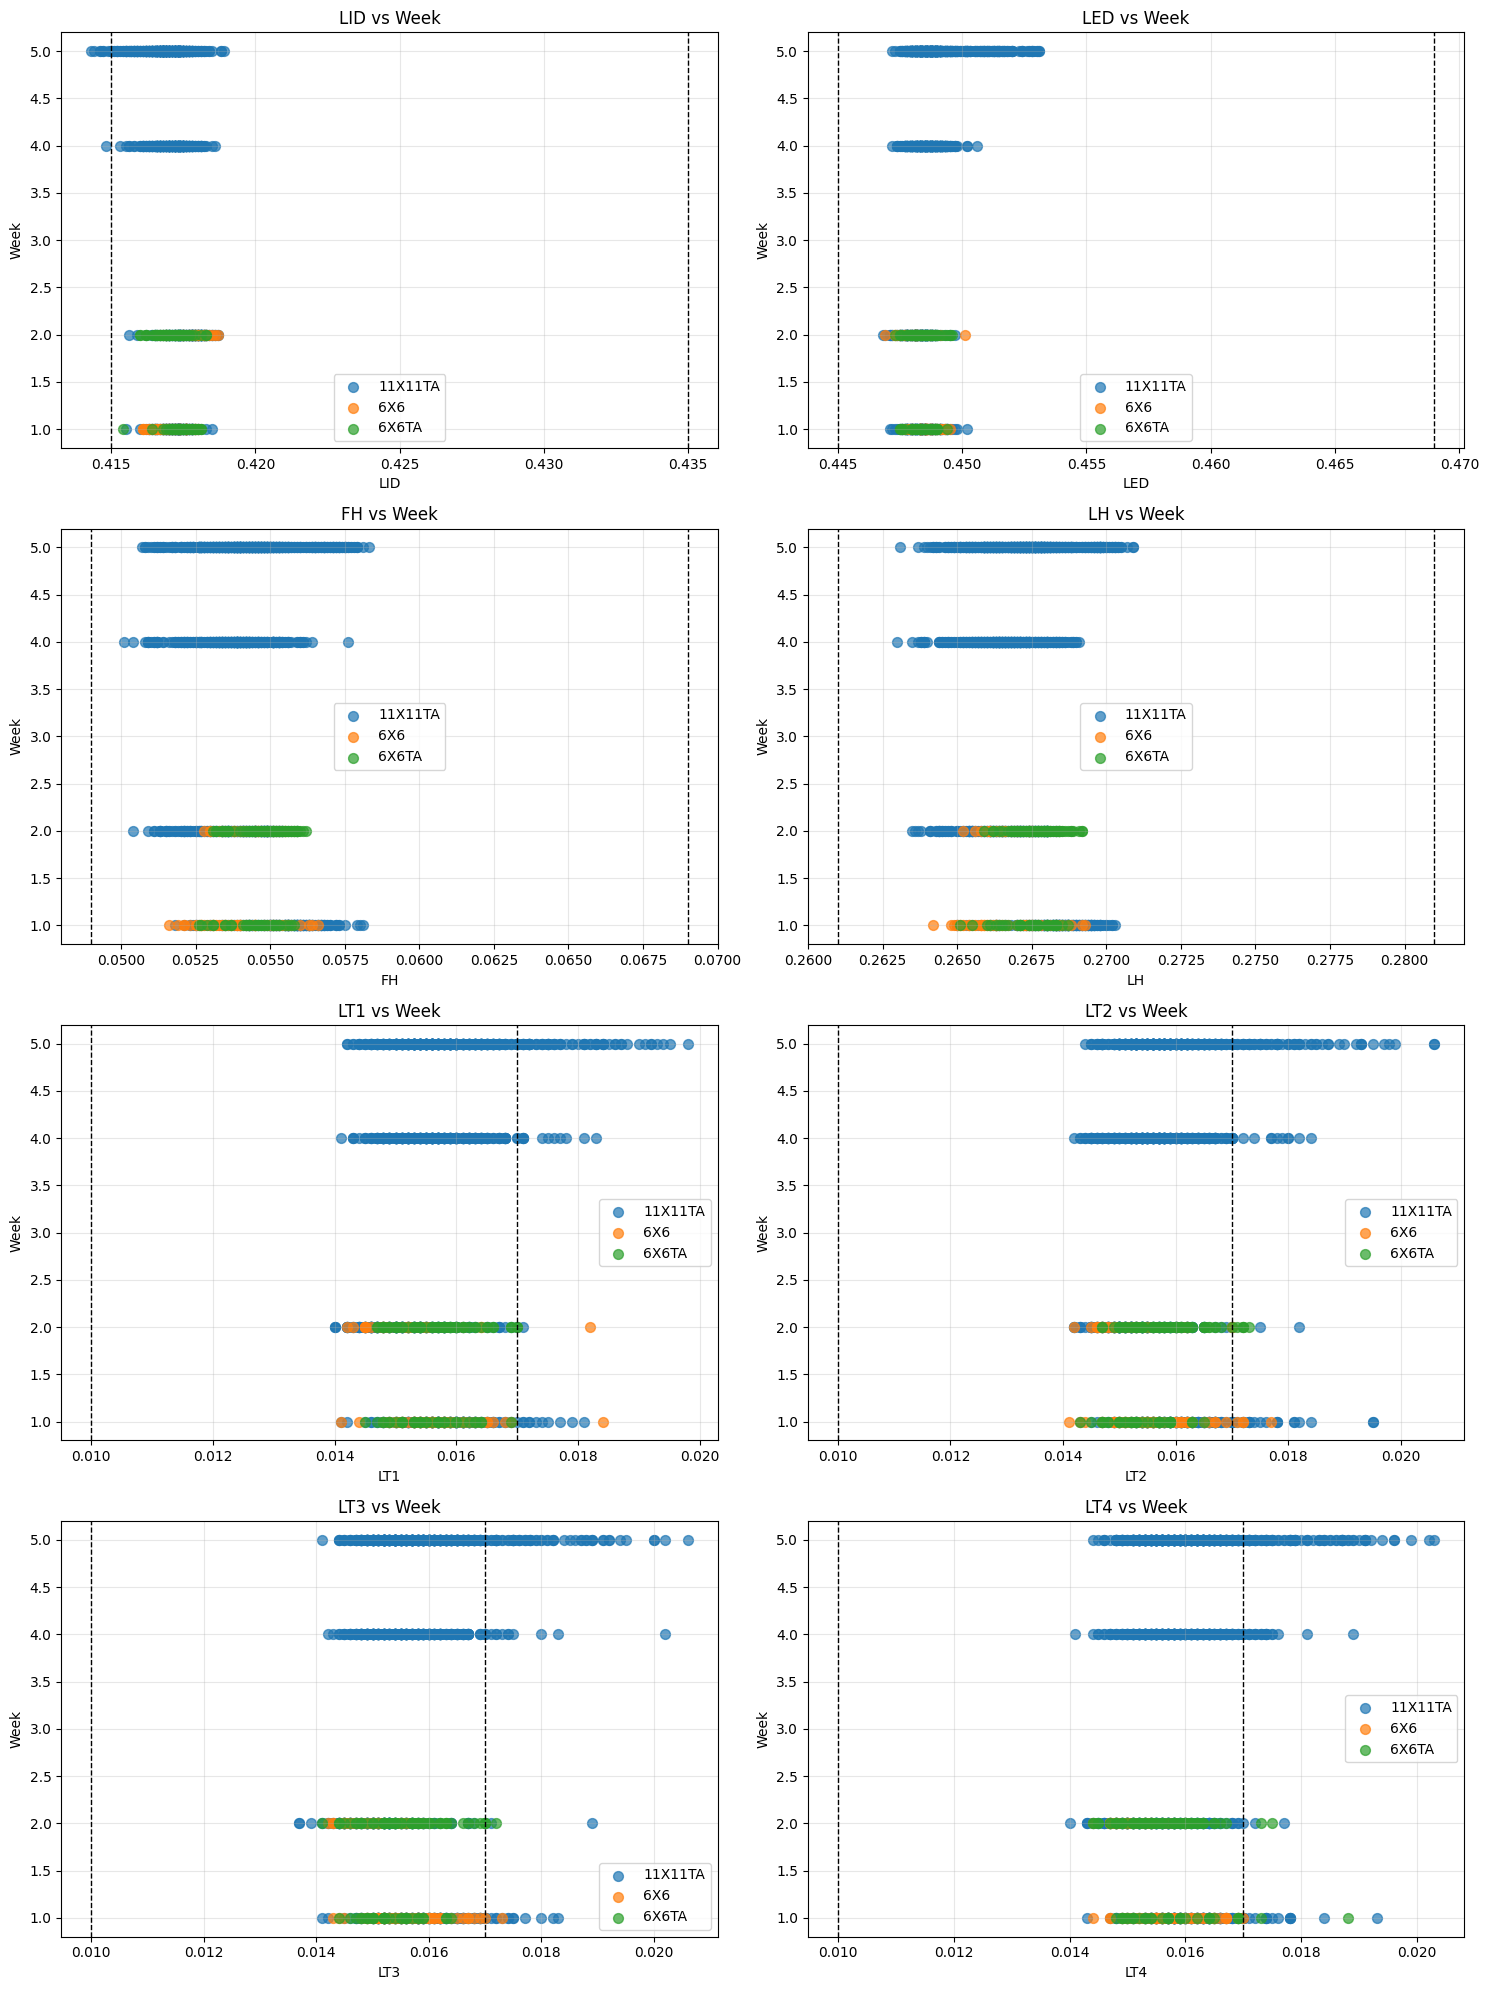

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for idx, (var, range_vals) in enumerate(specs.items()):
    ax = axes[idx]
    
    # Scatter
    for layout in all_data['Layout'].unique():
        subset = all_data[all_data['Layout'] == layout]
        ax.scatter(subset[var], subset['week'], label=layout, s=50, alpha=0.7)
    
    # Limits
    ax.axvline(range_vals[0], linestyle='--', color='black', linewidth=1)
    ax.axvline(range_vals[1], linestyle='--', color='black', linewidth=1)
    
    ax.set_title(f'{var} vs Week')
    ax.set_xlabel(var)
    ax.set_ylabel('Week')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

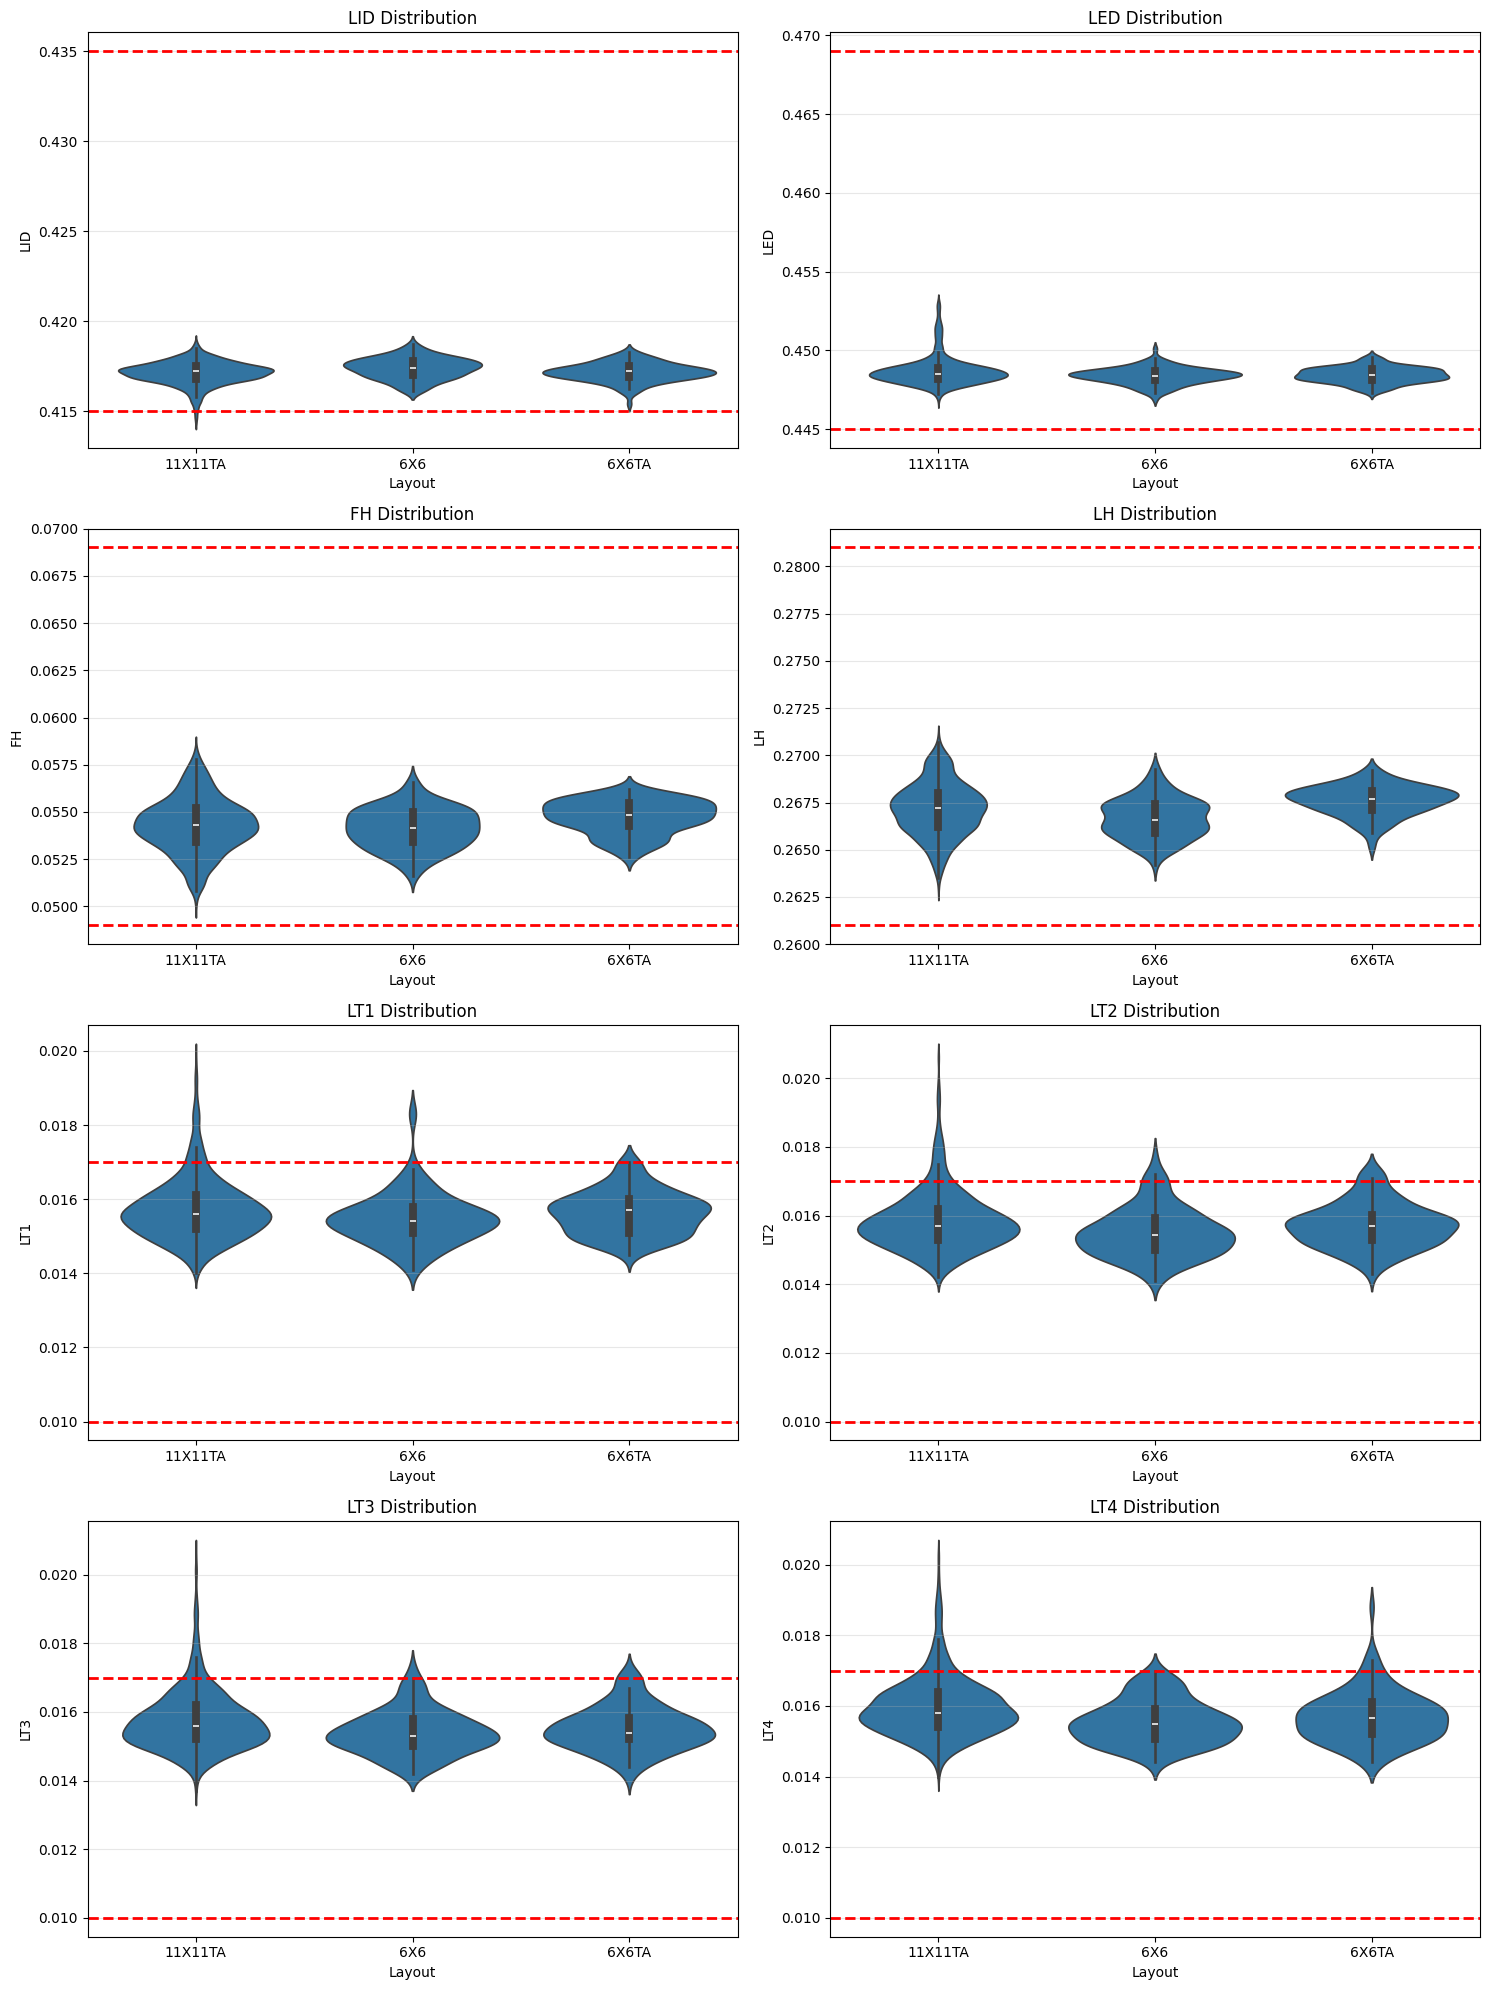

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for idx, (var, range_vals) in enumerate(specs.items()):
    ax = axes[idx]
    
    # Violin plot
    sns.violinplot(data=all_data, x='Layout', y=var, ax=ax)
    
    # Spec limits
    ax.axhline(range_vals[0], linestyle='--', color='red', linewidth=2, label='Spec limits')
    ax.axhline(range_vals[1], linestyle='--', color='red', linewidth=2)
    
    ax.set_title(f'{var} Distribution')
    ax.grid(True, alpha=0.3, axis='y')
    
plt.tight_layout()
plt.show()

Total cups: 1560
Scrap cups: 277 (17.8%)


C:\Users\Mac Prom\AppData\Local\Temp\ipykernel_15316\742004987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scrap_data, x='Layout', y=var, ax=ax, palette='Set2')
C:\Users\Mac Prom\AppData\Local\Temp\ipykernel_15316\742004987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scrap_data, x='Layout', y=var, ax=ax, palette='Set2')
C:\Users\Mac Prom\AppData\Local\Temp\ipykernel_15316\742004987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scrap_data, x='Layout', y=var, ax=ax, palette='Set2')
C:\Users\Mac 

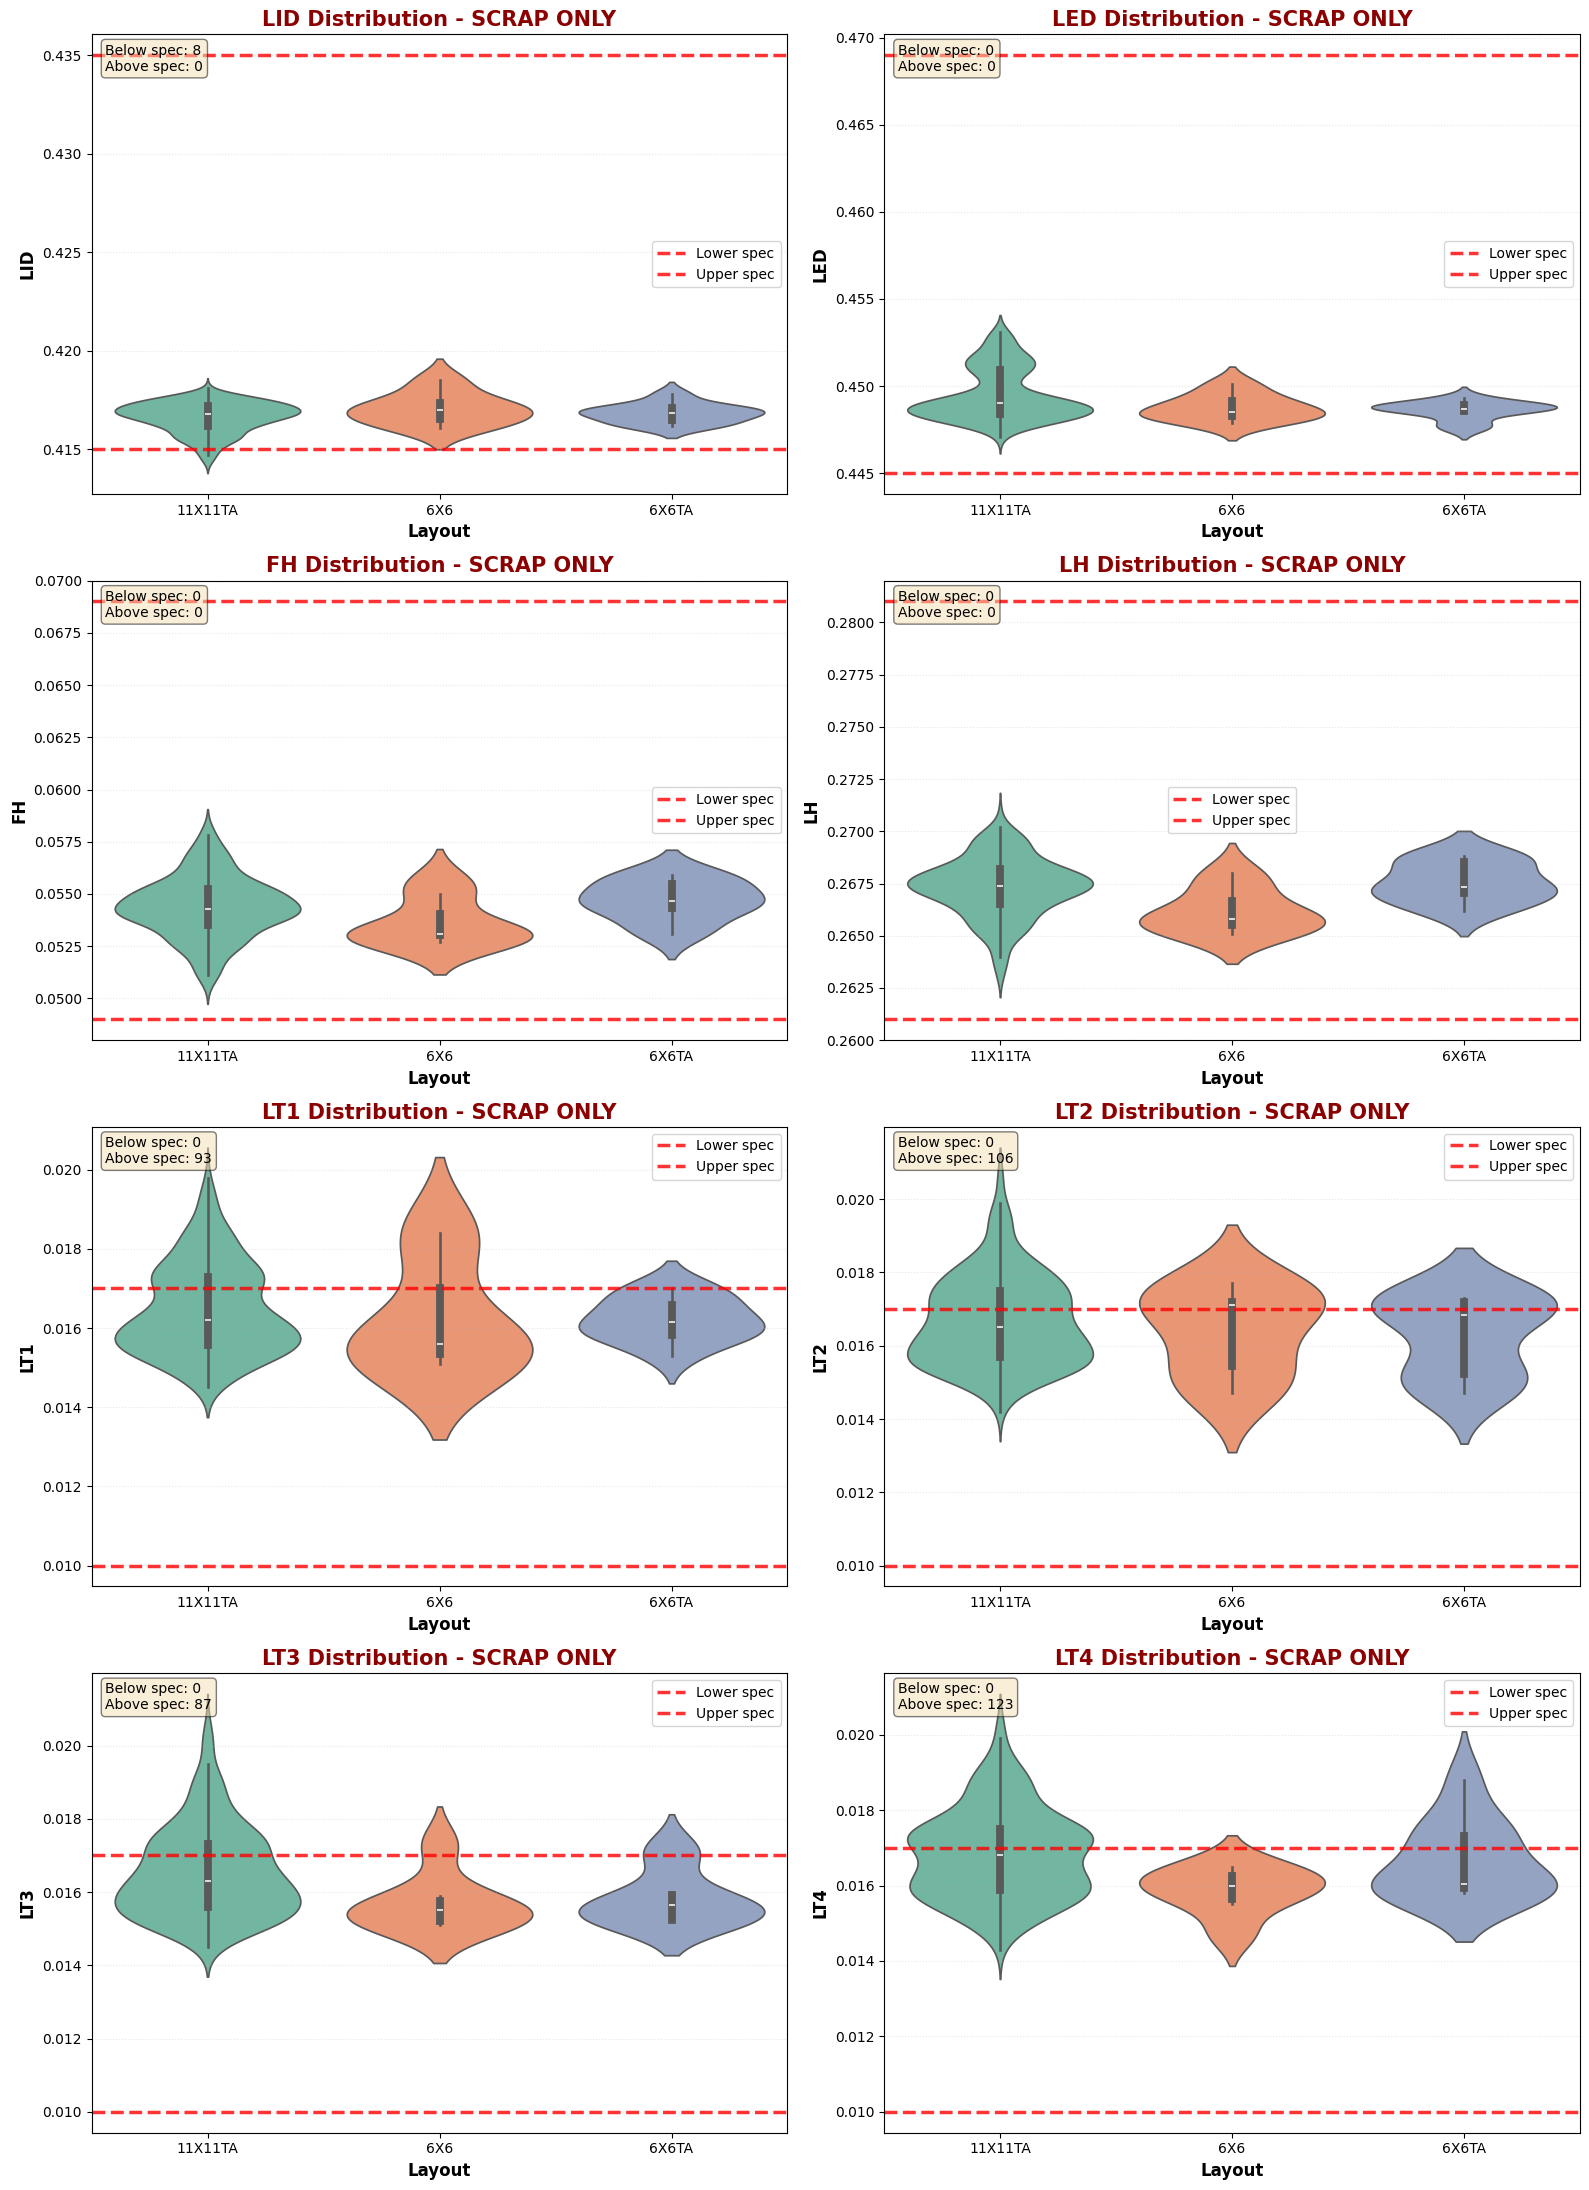


=== SCRAP FAILURE PATTERNS ===

LID:
  Below spec: 8 (2.9%)
  Above spec: 0 (0.0%)

LED:
  Below spec: 0 (0.0%)
  Above spec: 0 (0.0%)

FH:
  Below spec: 0 (0.0%)
  Above spec: 0 (0.0%)

LH:
  Below spec: 0 (0.0%)
  Above spec: 0 (0.0%)

LT1:
  Below spec: 0 (0.0%)
  Above spec: 93 (33.6%)

LT2:
  Below spec: 0 (0.0%)
  Above spec: 106 (38.3%)

LT3:
  Below spec: 0 (0.0%)
  Above spec: 87 (31.4%)

LT4:
  Below spec: 0 (0.0%)
  Above spec: 123 (44.4%)


In [24]:
# Option 5 with Violin Plots - Scrap only
scrap_data = all_data[all_data['is_scrap']]

print(f"Total cups: {len(all_data)}")
print(f"Scrap cups: {len(scrap_data)} ({len(scrap_data)/len(all_data)*100:.1f}%)")

fig, axes = plt.subplots(4, 2, figsize=(16, 22))
axes = axes.flatten()

for idx, (var, range_vals) in enumerate(specs.items()):
    ax = axes[idx]
    
    # Violin plot - SCRAP ONLY by layout
    sns.violinplot(data=scrap_data, x='Layout', y=var, ax=ax, palette='Set2')
    
    # Spec limits (red dashed lines)
    ax.axhline(range_vals[0], linestyle='--', color='red', linewidth=2.5, label='Lower spec', alpha=0.8)
    ax.axhline(range_vals[1], linestyle='--', color='red', linewidth=2.5, label='Upper spec', alpha=0.8)
    
    # Styling
    ax.set_title(f'{var} Distribution - SCRAP ONLY', fontsize=15, fontweight='bold', color='darkred')
    ax.set_xlabel('Layout', fontsize=12, fontweight='bold')
    ax.set_ylabel(var, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y', linestyle=':')
    ax.legend(fontsize=10)
    
    # Add text showing which direction failures go
    lower, upper = range_vals
    below_spec = (scrap_data[var] < lower).sum()
    above_spec = (scrap_data[var] > upper).sum()
    
    ax.text(0.02, 0.98, f'Below spec: {below_spec}\nAbove spec: {above_spec}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Summary table
print("\n=== SCRAP FAILURE PATTERNS ===")
for var, (lower, upper) in specs.items():
    below = (scrap_data[var] < lower).sum()
    above = (scrap_data[var] > upper).sum()
    total = len(scrap_data)
    print(f"\n{var}:")
    print(f"  Below spec: {below} ({below/total*100:.1f}%)")
    print(f"  Above spec: {above} ({above/total*100:.1f}%)")